# **FINAL PROJECT: 03**
### 22KDL - TEAM15


<table width="100%" style="border:0px;">
    <tr style="font-size: 10pt">
        <td><b>Name:</b> Huỳnh Thảo Quỳnh</td>
        <td><b>MSSV:</b> 22280075</td>
    </tr>
    <tr style="font-size: 10pt">
        <td><b>Name:</b> Lê Thanh Sang</td>
        <td><b>MSSV:</b> 22280076</td>
    </tr>
    <tr style="font-size: 10pt">
        <td><b>Name:</b> Đinh Xuân Khang</td>
        <td><b>MSSV:</b> 22280042</td>
    </tr>
</table>


**HYPOTHESIS**: Tổng số lượt bán của từng sản phẩm bị ảnh hưởng bởi nhiều yếu tố.

**Phân tích đề bài**

**Data collection**
- Lazada:
   * thời trang: quần áo, giày dép, trang sức
   * điện tử: điện thoại, laptop, tivi
- Features cần thu thập:
  * **Type**:     danh mục
  * **Title**:    tên sản phẩm
  * **Link**
  * **Price_sale**: giá sau khi được giảm giá
  * **Sale_off**: phần trăm giảm giá
  * **Total_sold**: tổng số lượt mua
  * **Preview**: tổng số lượt đánh giá
  * **Location**: địa điểm
  * **Price_original**: giá ban đầu
  * **Ship_price**: tiền ship
  * **Return**: chính sách trả hàng
  * **Sale_rating**: phần trăm đơn hàng được đánh giá tích cực
  * **Ship_on_time**: phần trăm đơn hàng được ship đúng thời gian
  * **Chat_response**: phần trăm khả năng phản hồi của người bán
  * **One_star**: tổng số lượt đánh giá 1 sao
  * **Two_star**: tổng số lượt đánh giá 2 sao
  * **Three_star**: tổng số lượt đánh giá 3 sao
  * **Four_star**: tổng số lượt đánh giá 4 sao
  * **Five_star**: tổng số lượt đánh giá 5 sao



### **I/ Crawl data from the web (text, HTML) that is relevant to your hypothesis.**

### **II/ Use a Large Language Model (LLM) to parse this unstructured data into features.**

### **III/ Apply causal inference techniques to test your hypothesis.**

#### 3.1 Handling missing values

In [83]:
import pandas as pd
import numpy as np
from unidecode import unidecode

In [84]:
data = pd.read_csv("Final_Data_LLM.csv")
data.head(3)

,Type,Price_sale,Sale_off,Total_sold,Preview,Location,Price_original,Ship_price,Sale_rating,Ship_on_time,Chat_response,One_star,Two_star,Three_star,Four_star,Five_star
0,quần áo,35891,64.0,3000.0,1022.0,Hồ Chí Minh,100000.0,16500.0,97.0,100.0,100.0,20.0,7.0,27.0,36.0,932.0
1,quần áo,25000,50.0,907.0,241.0,Hồ Chí Minh,71998.0,16500.0,91.0,100.0,50.0,5.0,2.0,6.0,7.0,222.0
2,quần áo,79000,43.0,961.0,260.0,Hà Nội,139000.0,32700.0,92.0,99.0,33.0,11.0,8.0,8.0,16.0,218.0


In [85]:
data.columns

Index(['Type', 'Price_sale', 'Sale_off', 'Total_sold', 'Preview', 'Location', 'Price_original', 'Ship_price', 'Sale_rating', 'Ship_on_time', 'Chat_response', 'One_star', 'Two_star', 'Three_star', 'Four_star', 'Five_star'], dtype='object')

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7152 entries, 0 to 7151
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Type            7152 non-null   object 
 1   Price_sale      7152 non-null   int64  
 2   Sale_off        5306 non-null   object 
 3   Total_sold      5312 non-null   object 
 4   Preview         5435 non-null   object 
 5   Location        7152 non-null   object 
 6   Price_original  5755 non-null   float64
 7   Ship_price      5905 non-null   object 
 8   Sale_rating     6489 non-null   object 
 9   Ship_on_time    5398 non-null   float64
 10  Chat_response   6060 non-null   object 
 11  One_star        7152 non-null   float64
 12  Two_star        7152 non-null   float64
 13  Three_star      7152 non-null   float64
 14  Four_star       7152 non-null   float64
 15  Five_star       6887 non-null   float64
dtypes: float64(7), int64(1), object(8)
memory usage: 894.1+ KB


In [87]:
data.isnull().sum().sort_values(ascending=False)

Sale_off          1846
Total_sold        1840
Ship_on_time      1754
Preview           1717
Price_original    1397
Ship_price        1247
Chat_response     1092
Sale_rating        663
Five_star          265
Type                 0
Price_sale           0
Location             0
One_star             0
Two_star             0
Three_star           0
Four_star            0
dtype: int64

**Type & Location**

In [88]:
#Chuyển các cột Type và Location thành không dấu
print(data['Type'].unique(), "\n")
print(data['Location'].unique(), "\n")

['quần áo' 'giày dép' 'Trang sức' 'Trang suc' 'dien thoai' 'laptop' 'tivi'] 

['Hồ Chí Minh' 'Hà Nội' 'Nam Định' 'Nước ngoài' 'Tiền Giang' 'Cần Thơ'
 'Hà Nam' 'Trà Vinh' 'Thanh Hóa' 'Hưng Yên' 'Long An' 'Bến Tre' 'Phú Thọ'
 'Lâm Đồng' 'Đồng Nai' 'Hải Dương' 'Cà Mau' 'Bắc Giang' 'Quảng Ngãi'
 'Tây Ninh' 'Bình Định' 'Phú Yên' 'Bình Dương' 'Bắc Ninh' 'Đà Nẵng'
 'Vĩnh Phúc' 'Ho Chi Minh' 'Ha Noi' 'Hai Duong' 'Nghệ An' 'Binh Duong'
 'Hung Yen' 'Hai Phong' 'Da Nang' 'An Giang' 'Bac Ninh' 'Ben Tre'
 'Vinh Phuc' 'Nam Dinh' 'Tien Giang' 'Dak Nong' 'Thai Binh' 'Dak Lak'
 'Hanoi' 'Dong Nai' 'Thai Nguyen' 'Quang Tri' 'Thanh Hoa' 'Tay Ninh'
 'Nuoc Ngoai' 'Phu Tho' 'Nuoc ngai' 'Thua Thien Hue' 'Thái Bình'
 'Dong Thap' 'Ha Tinh' 'Phu Yen' 'Ba Ria Vung Tau' 'Bac Giang' 'Vinh Long'
 'Quang Nam'] 



In [89]:
#Chuyển cột Type
data['Type'].replace(['quần áo'], 'quan ao', inplace=True)
data['Type'].replace(['giày dép'], 'giay dep', inplace=True)
data['Type'].replace(['Trang sức', 'Trang suc'], 'trang suc', inplace=True)

In [90]:
#Hàm chuyển đổi thành không dấu
def remove_diacritics(text):
    return unidecode(text)

data['Location'] = data['Location'].apply(remove_diacritics)
data['Location'].unique()

array(['Ho Chi Minh', 'Ha Noi', 'Nam Dinh', 'Nuoc ngoai', 'Tien Giang',
       'Can Tho', 'Ha Nam', 'Tra Vinh', 'Thanh Hoa', 'Hung Yen',
       'Long An', 'Ben Tre', 'Phu Tho', 'Lam Dong', 'Dong Nai',
       'Hai Duong', 'Ca Mau', 'Bac Giang', 'Quang Ngai', 'Tay Ninh',
       'Binh Dinh', 'Phu Yen', 'Binh Duong', 'Bac Ninh', 'Da Nang',
       'Vinh Phuc', 'Nghe An', 'Hai Phong', 'An Giang', 'Dak Nong',
       'Thai Binh', 'Dak Lak', 'Hanoi', 'Thai Nguyen', 'Quang Tri',
       'Nuoc Ngoai', 'Nuoc ngai', 'Thua Thien Hue', 'Dong Thap',
       'Ha Tinh', 'Ba Ria Vung Tau', 'Vinh Long', 'Quang Nam'],
      dtype=object)

In [91]:
#Chỉnh lại dữ liệu cho đồng nhất
data['Location'].replace(['Hanoi'], 'Ha Noi', inplace=True)
data['Location'].replace(['Nuoc ngoai', 'Nuoc ngai'], 'Nuoc Ngoai', inplace=True)
data['Location'].unique()

array(['Ho Chi Minh', 'Ha Noi', 'Nam Dinh', 'Nuoc Ngoai', 'Tien Giang',
       'Can Tho', 'Ha Nam', 'Tra Vinh', 'Thanh Hoa', 'Hung Yen',
       'Long An', 'Ben Tre', 'Phu Tho', 'Lam Dong', 'Dong Nai',
       'Hai Duong', 'Ca Mau', 'Bac Giang', 'Quang Ngai', 'Tay Ninh',
       'Binh Dinh', 'Phu Yen', 'Binh Duong', 'Bac Ninh', 'Da Nang',
       'Vinh Phuc', 'Nghe An', 'Hai Phong', 'An Giang', 'Dak Nong',
       'Thai Binh', 'Dak Lak', 'Thai Nguyen', 'Quang Tri',
       'Thua Thien Hue', 'Dong Thap', 'Ha Tinh', 'Ba Ria Vung Tau',
       'Vinh Long', 'Quang Nam'], dtype=object)

**Price_Sale & Sale_off & Price_original**

In [92]:
print(data['Sale_off'].unique())

['64.0' '50.0' '43.0' '60.0' '54.0' '67.0' nan '61.0' '66.0' '53.0' '47.0'
 '45.0' '57.0' '52.0' '49.0' '44.0' '30.0' '29.0' '56.0' '59.0' '8.0'
 '35.0' '58.0' '31.0' '12.0' '51.0' '21.0' '81.0' '41.0' '96.0' '39.0'
 '40.0' '46.0' '48.0' '33.0' '15.0' '42.0' '13.0' '79.0' '76.0' '24.0'
 '7.0' '23.0' '62.0' '65.0' '32.0' '55.0' '14.0' '26.0' '70.0' '37.0'
 '82.0' '83.0' '69.0' '63.0' '34.0' '94.0' '71.0' '73.0' '18.0' '77.0'
 '16.0' '72.0' '36.0' '86.0' '85.0' '78.0' '84.0' '28.0' '38.0' '25.0'
 '97.0' '20.0' '68.0' '17.0' '89.0' '88.0' '1.0' '75.0' '74.0' '22.0'
 '80.0' '92.0' '27.0' '5.0' '10.0' '11.0' '100.0' '6.0' '19.0' '9.0'
 '99.0' '98.0' '93.0' '7' '10' '16' '6' '15' '11' '12' '17' '8' '13' '27'
 '22' '29' '18' '9' '14' '31' '42' '35' '34' '25' '20' '26' '23' '19' '52'
 '21' '1' '24' '60' '5' '32' '3' '37' '40' '46' '28' '30' '45' '36' '38'
 '33' '41' '39' '2' '4' '1200' 'none' '0' '3.0' '4.0' '2.0' '1.1' '0.0']


In [93]:
data['Sale_off'] = data['Sale_off'].replace("none", None)

#Chuyển đổi float cho Sale_off & Price_sale
data['Sale_off'] = data['Sale_off'].astype(float)
data['Price_sale'] = data['Price_sale'].astype(float)

#Check null cho cột Sale_off
data['Sale_off'].isnull().sum()

1848

In [94]:
# Xoá dữ liệu cột Sale_off >= 100
indices_to_drop = data.loc[data['Sale_off'] >= 100].index
print(indices_to_drop)
data = data.drop(indices_to_drop)

Index([2040, 4158], dtype='int64')


In [95]:
# Tính toán giá trị vào NaN
#TH1: Price_original == NULL, Sale_off != NULL
data['Price_original'].fillna(data['Price_sale'] / (1 - data['Sale_off'] / 100), inplace=True)

#TH2: Sale_off == NULL,  Price_original != NULL
data['Sale_off'].fillna(((data['Price_original'] - data['Price_sale']) / data['Price_original']) * 100, inplace=True)

#TH3: Sale_off & Price_original == NULL
data['Sale_off'].fillna(0, inplace=True)
data['Price_original'].fillna(data['Price_sale'], inplace=True)

In [96]:
# Xoá hàng giá gốc < giá sale
data = data[data['Price_original'] >= data['Price_sale']]
data.head()

,Type,Price_sale,Sale_off,Total_sold,Preview,Location,Price_original,Ship_price,Sale_rating,Ship_on_time,Chat_response,One_star,Two_star,Three_star,Four_star,Five_star
0,quan ao,35891.0,64.0,3000.0,1022.0,Ho Chi Minh,100000.0,16500.0,97.0,100.0,100.0,20.0,7.0,27.0,36.0,932.0
1,quan ao,25000.0,50.0,907.0,241.0,Ho Chi Minh,71998.0,16500.0,91.0,100.0,50.0,5.0,2.0,6.0,7.0,222.0
2,quan ao,79000.0,43.0,961.0,260.0,Ha Noi,139000.0,32700.0,92.0,99.0,33.0,11.0,8.0,8.0,16.0,218.0
3,quan ao,36000.0,60.0,102.0,21.0,Nam Dinh,189000.0,37700.0,94.0,100.0,83.0,1.0,0.0,1.0,1.0,18.0
4,quan ao,15971.0,54.0,219.0,68.0,Ha Noi,59000.0,32700.0,95.0,100.0,100.0,0.0,1.0,0.0,3.0,65.0


**Total_sold & Preview & Ship_price & Sale_rating & Ship_on_time & Chat_response**

In [97]:
#Gán 0 cho 'Total_sold', 'Preview'
data['Total_sold'] = pd.to_numeric(data['Total_sold'], errors='coerce').fillna(0).astype(float)
data['Preview'] = pd.to_numeric(data["Preview"], errors='coerce').fillna(0).astype(float)

In [98]:
#Ship_price
data['Ship_price'] = pd.to_numeric(data['Ship_price'], errors='coerce').fillna(0).astype(int)
data['Ship_price'].unique()

array([   16500,    32700,    37700,    18300,        0,    17000,
          28700,    38000,    51100,    27000,    32200,    15500,
          45100,    44100,    19600,    43900,    23500,    27300,
          12200,      700,     8000,    20300,    57700,     7300,
           6000,    20100,    22700,    21500,    56800,    51500,
          20700,    40100,    23900,    40300,   635900,    21700,
           5500,   202600,   110800,    19000,  1928000,    26100,
          13700,    64800,    73600,    10200,      100,       98,
          84600,   198200,   744000,    21200,    65500,     9700,
          23800,    70000,    52400,    80200,   104900,       97,
          74400,     1200,    74700,       95,   100600,   118500,
          55400,    12800,    48200,    90700,    63300,    52300,
          90400,    34100,    64700,    13800,   494000,    63400,
        2695100,    16300,       90,    62600,   115100,     9100,
          90600,    63700,    30900,    94800,    32500,      

In [99]:
#Ship_on_time: chuyển sang int rồi fill NaN = median
data['Ship_on_time'] = pd.to_numeric(data['Ship_on_time'], errors='coerce').fillna(0).astype(int)
median_Ship_on_time = data['Ship_on_time'].median()
data['Ship_on_time'] = data['Ship_on_time'].replace([0], int(median_Ship_on_time))

data['Ship_on_time'].unique()

array([100,  99,  96,  97,  98,  93,  91,  87,  84,  92,  95,  83,  80,
        63,  86,  67,  28,  82,  85,  94,  60,  88,   3,  79,  89,  74,
        33,  90,  41,  81,  76,  29,  71,  66,  25,  13,  50,  72,  75,
        44,  70,  68,  57,  55,  78,  14,  20,  37,  65,  77,  40])

In [100]:
#Sale_rating: chuyển sang int rồi fill NaN = median
data['Sale_rating'] = pd.to_numeric(data['Sale_rating'], errors='coerce').fillna(0).astype(int)
median_Sale_rating = data['Sale_rating'].median()
data['Sale_rating'] = data['Sale_rating'].replace([0], int(median_Sale_rating))

data['Sale_rating'].unique()

array([ 97,  91,  92,  94,  95,  99,  88,  98,  93,  96,  86,  85,  69,
        90,  87,  89,  83,  62,  64,  84, 100,  78,  66,  68,  65,  77,
        76,  71,  74,  75,  73,  81,  60,  80,  40,  79,  82,  67])

In [101]:
#Chat_respone: chuyển sang int rồi fill NaN = median
data['Chat_response'] = pd.to_numeric(data['Chat_response'], errors='coerce').fillna(0).astype(int)
median_Chat_response = data['Chat_response'].median()
data['Chat_response'] = data['Chat_response'].replace([0], int(median_Chat_response))

data['Chat_response'].unique()

array([100,  50,  33,  83,  97,  60,  66,  90,  81,  98,  99,  54,  42,
        91,  82,  96,  34,  69,  64,  80,  58,  94,  87,  85,  57,  86,
        75,  63,  79,  71,  88,  92,  56,  77,  84,  93,  95,  72,  46,
        73,  78,  44,  76,  40,  70,  62,  53,  36,   6,  13,  89,  37,
         1,  55,  65,  52])

**Five_star**

In [102]:
#Loại bỏ những giá trị Null của cột Five_star
data = data.dropna(subset=['Five_star'])

In [103]:
#Check NULL
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6865 entries, 0 to 7151
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Type            6865 non-null   object 
 1   Price_sale      6865 non-null   float64
 2   Sale_off        6865 non-null   float64
 3   Total_sold      6865 non-null   float64
 4   Preview         6865 non-null   float64
 5   Location        6865 non-null   object 
 6   Price_original  6865 non-null   float64
 7   Ship_price      6865 non-null   int32  
 8   Sale_rating     6865 non-null   int32  
 9   Ship_on_time    6865 non-null   int32  
 10  Chat_response   6865 non-null   int32  
 11  One_star        6865 non-null   float64
 12  Two_star        6865 non-null   float64
 13  Three_star      6865 non-null   float64
 14  Four_star       6865 non-null   float64
 15  Five_star       6865 non-null   float64
dtypes: float64(10), int32(4), object(2)
memory usage: 804.5+ KB


**Drop duplicates**

In [104]:
#Check duplicated data
data.duplicated().sum()

2525

In [105]:
#Drop duplicated
data = data.drop_duplicates()
#Reset index
data.reset_index(drop=True, inplace=True)
data

,Type,Price_sale,Sale_off,Total_sold,Preview,Location,Price_original,Ship_price,Sale_rating,Ship_on_time,Chat_response,One_star,Two_star,Three_star,Four_star,Five_star
0,quan ao,35891.0,64.000000,3000.0,1022.0,Ho Chi Minh,100000.0,16500,97,100,100,20.0,7.0,27.0,36.0,932.0
1,quan ao,25000.0,50.000000,907.0,241.0,Ho Chi Minh,71998.0,16500,91,100,50,5.0,2.0,6.0,7.0,222.0
2,quan ao,79000.0,43.000000,961.0,260.0,Ha Noi,139000.0,32700,92,99,33,11.0,8.0,8.0,16.0,218.0
3,quan ao,36000.0,60.000000,102.0,21.0,Nam Dinh,189000.0,37700,94,100,83,1.0,0.0,1.0,1.0,18.0
4,quan ao,15971.0,54.000000,219.0,68.0,Ha Noi,59000.0,32700,95,100,100,0.0,1.0,0.0,3.0,65.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,tivi,1000000.0,0.000000,0.0,0.0,Dong Nai,1000000.0,74700,95,97,98,0.0,0.0,0.0,0.0,0.0
4336,tivi,1500000.0,5.063291,0.0,1.0,Ha Noi,1580000.0,198200,91,90,96,0.0,0.0,0.0,0.0,1.0
4337,tivi,6150000.0,38.438438,0.0,0.0,Ho Chi Minh,9990000.0,0,97,98,89,0.0,0.0,0.0,0.0,0.0
4338,tivi,4250000.0,14.829659,0.0,0.0,Ha Noi,4990000.0,135500,100,40,98,0.0,0.0,0.0,0.0,0.0


In [106]:
ship_to_drop = data.loc[data['Ship_price'] >= 1000000].index
print(ship_to_drop)

data = data.drop(ship_to_drop)

Index([2228, 2482, 2524, 3238, 3639, 3652, 3940, 3967, 4323], dtype='int64')


In [107]:
data['Ship_price'].unique()

array([ 16500,  32700,  37700,  18300,      0,  17000,  28700,  38000,
        51100,  27000,  32200,  15500,  45100,  44100,  19600,  43900,
        23500,  27300,  12200,    700,   8000,  20300,  57700,   7300,
         6000,  20100,  22700,  21500,  56800,  51500,  20700,  40100,
        23900,  40300, 635900,  21700,   5500, 202600, 110800,  19000,
        26100,  13700,  64800,  73600,  10200,    100,  84600, 198200,
       744000,  21200,  65500,   9700,  23800,  70000,  52400,  80200,
       104900,  74400,   1200,  74700, 100600, 118500,  55400,  12800,
        48200,  90700,  63300,  52300,  90400,  34100,  64700,  13800,
       494000,  63400,  16300,  62600, 115100,   9100,  90600,  63700,
        30900,  94800,  32500,    261, 141300, 206800, 146000, 159200,
       131600, 258200,  46000, 238400,  21600,  88900,  79000,  72400,
        31600, 112600, 501400, 125200, 270400, 125300, 135500,  59400,
       337400, 148600, 271400, 164800,  71100, 585800, 290200, 253700,
      

#### 3.2 Encoding categorical variables

In [108]:
new_data = data.copy()

In [109]:
#Assign labels to 2 columns: Type và Location
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
new_data['Type'] = label_encoder.fit_transform(new_data['Type'])

new_data['Location'] = label_encoder.fit_transform(new_data['Location'])

In [110]:
#See the type of labeled categories
print(data['Type'].unique(), "\n")
print(new_data['Type'].unique(), "\n")

print(data['Location'].unique(), "\n")
print(new_data['Location'].unique(), "\n")

['quan ao' 'giay dep' 'trang suc' 'dien thoai' 'laptop' 'tivi'] 

[3 1 5 0 2 4] 

['Ho Chi Minh' 'Ha Noi' 'Nam Dinh' 'Nuoc Ngoai' 'Tien Giang' 'Can Tho'
 'Ha Nam' 'Tra Vinh' 'Thanh Hoa' 'Hung Yen' 'Long An' 'Ben Tre' 'Phu Tho'
 'Lam Dong' 'Dong Nai' 'Hai Duong' 'Ca Mau' 'Bac Giang' 'Quang Ngai'
 'Tay Ninh' 'Binh Dinh' 'Phu Yen' 'Binh Duong' 'Bac Ninh' 'Da Nang'
 'Vinh Phuc' 'Nghe An' 'An Giang' 'Hai Phong' 'Dak Nong' 'Thai Binh'
 'Dak Lak' 'Thai Nguyen' 'Quang Tri' 'Thua Thien Hue' 'Dong Thap'
 'Ha Tinh' 'Ba Ria Vung Tau' 'Vinh Long' 'Quang Nam'] 

[19 15 23 25 36  8 14 37 34 20 22  4 26 21 12 17  7  2 29 31  5 27  6  3
  9 39 24  0 18 11 32 10 33 30 35 13 16  1 38 28] 



#### Khám phá dữ liệu: EDA

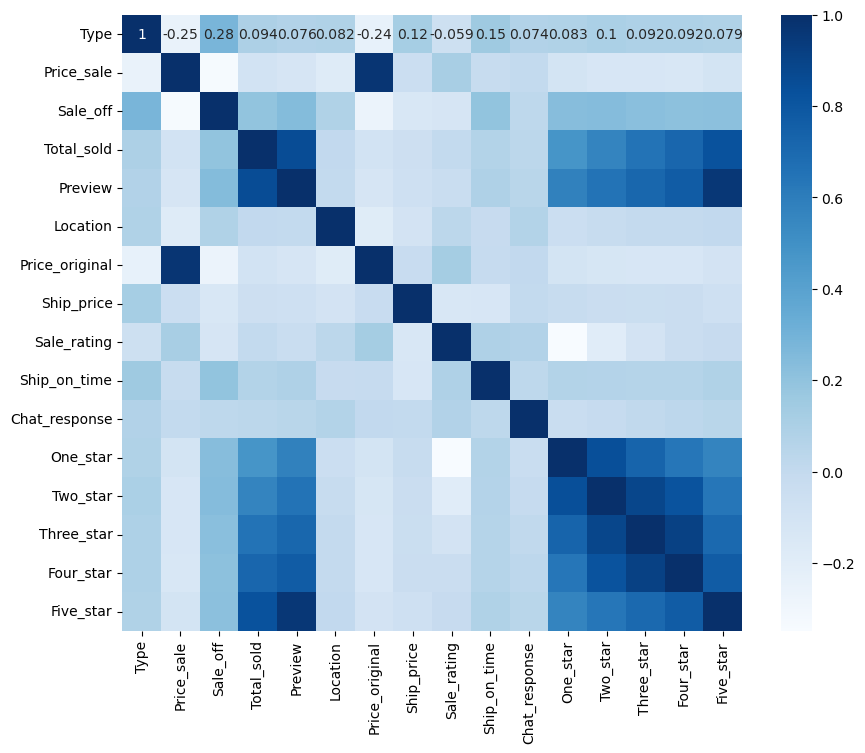

In [111]:
#Vẽ biểu đồ heatmap
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(new_data.corr(), annot=True, cmap='Blues')
plt.show()

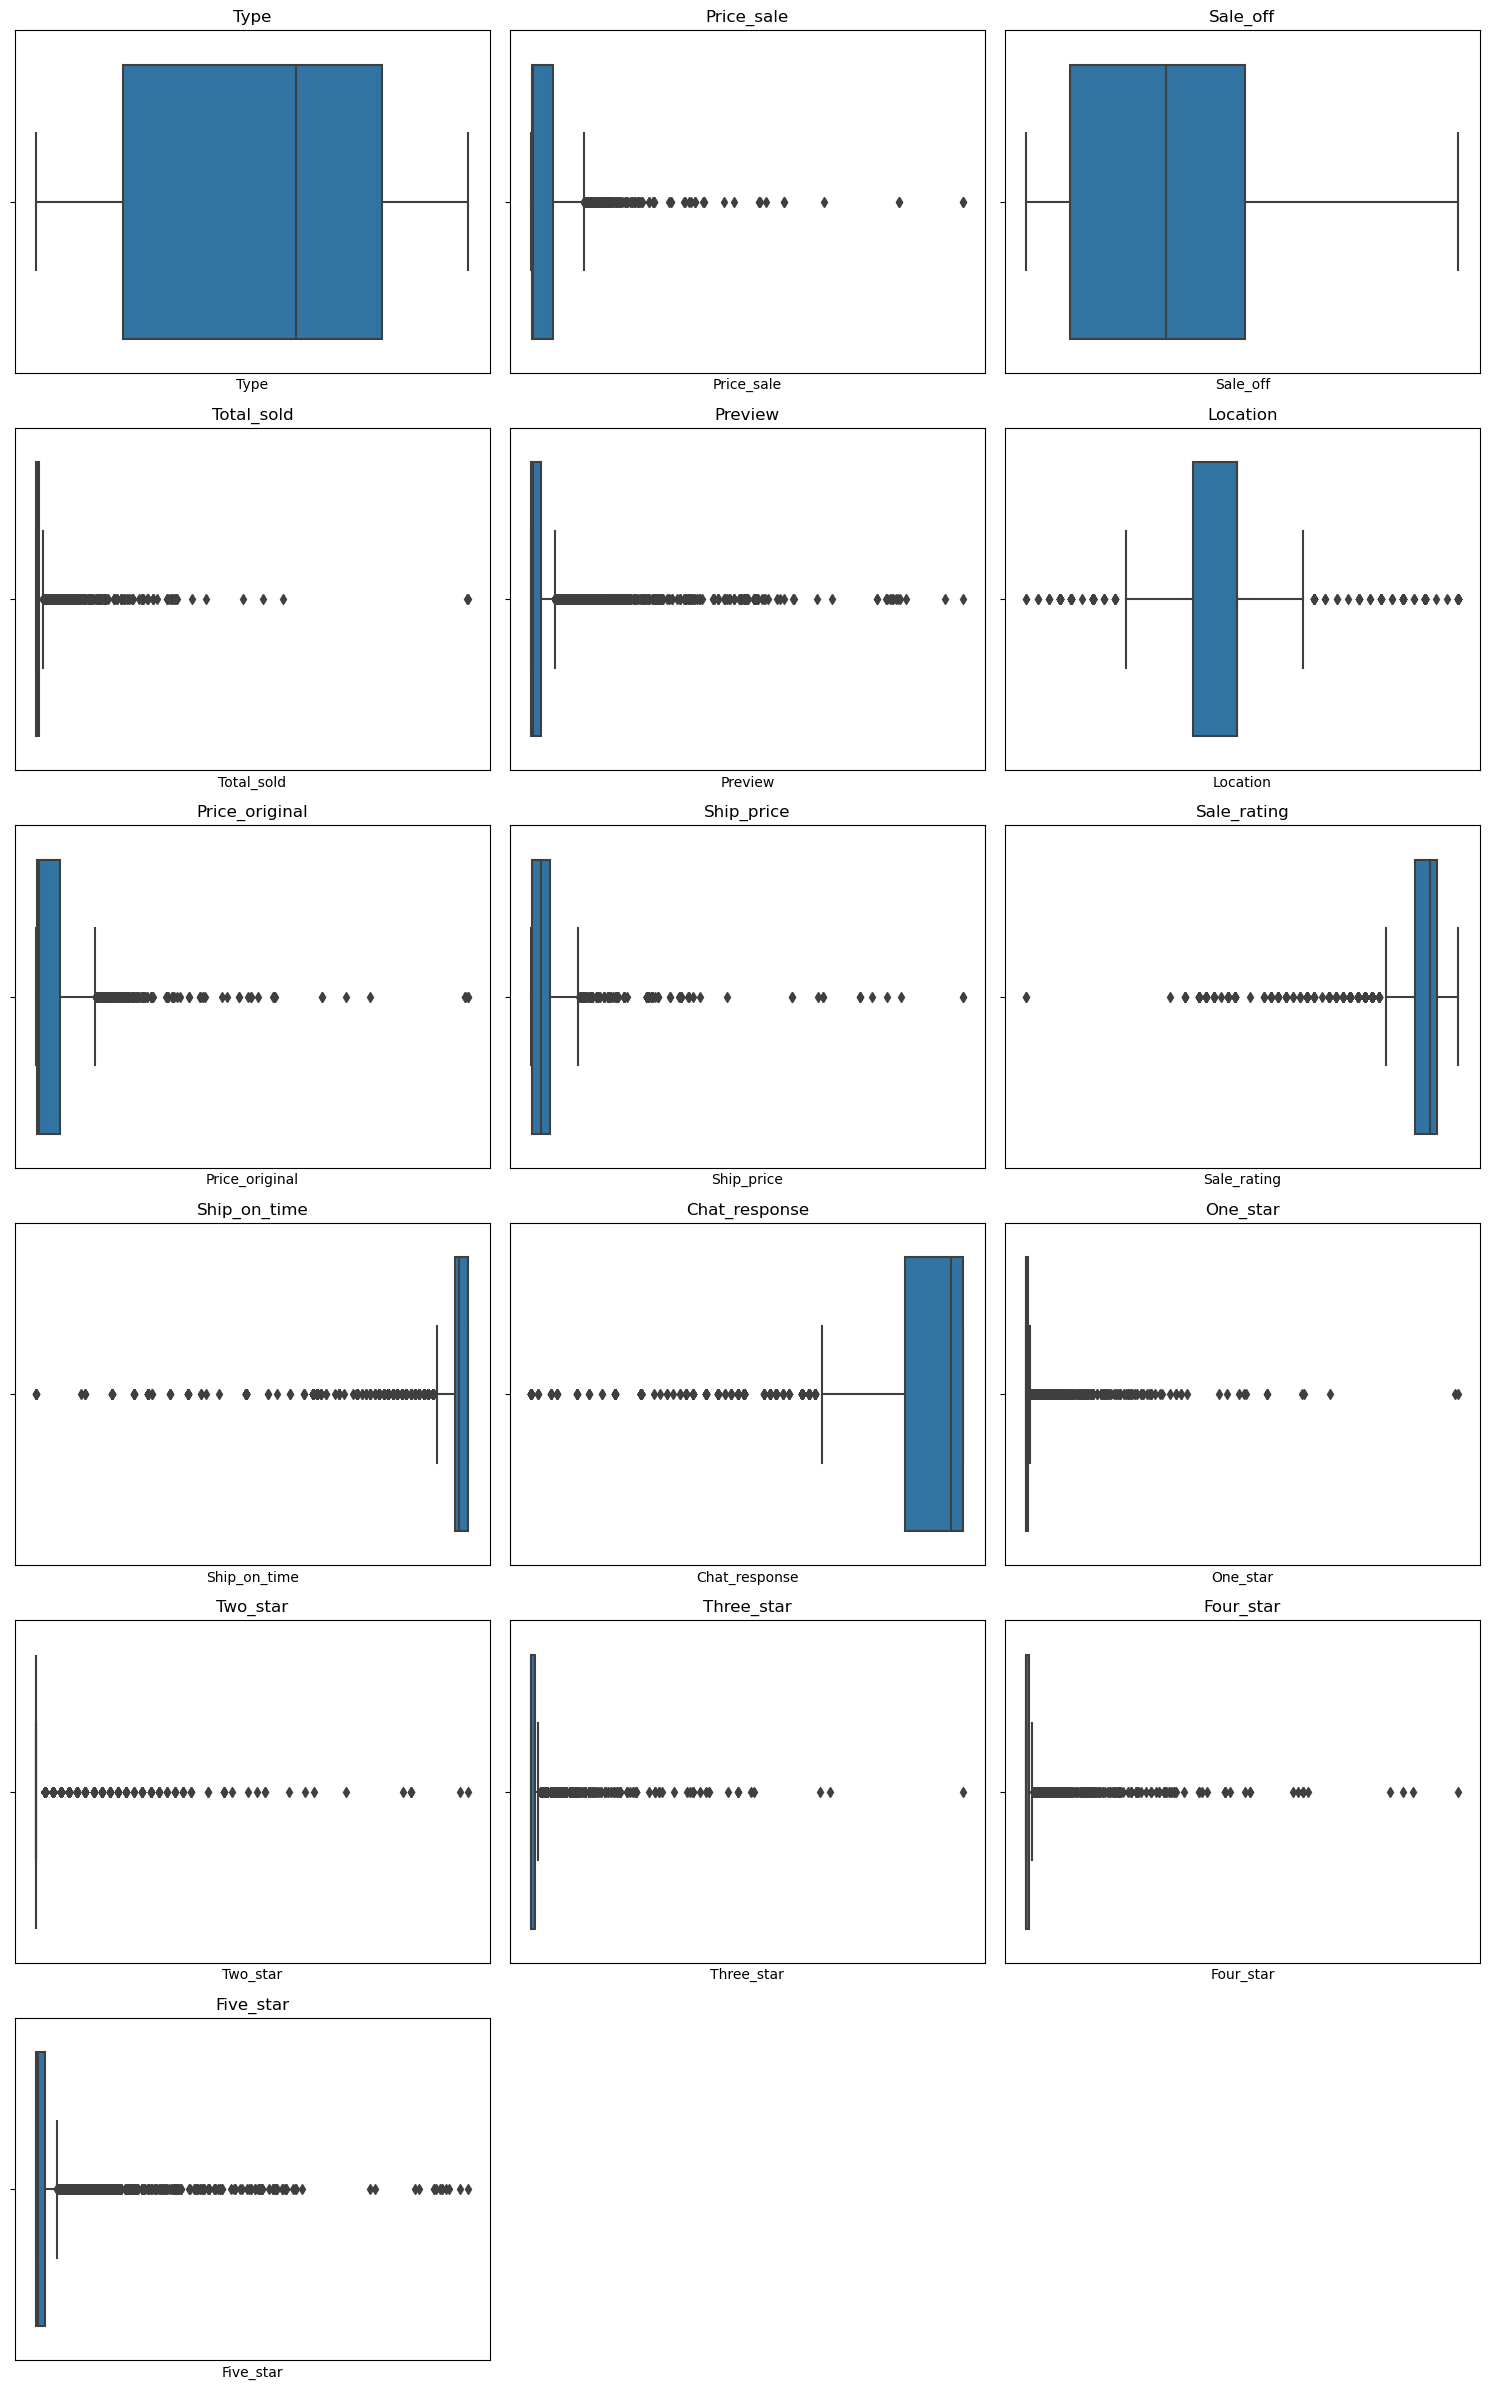

In [112]:
# Determine the number of columns to plot
num_cols = len(new_data.columns)

# Calculate the number of rows and columns for the subplots
num_rows = (num_cols + 2) // 3
num_cols_per_subplot = min(num_cols, 3)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols_per_subplot, figsize=(15, 4 * num_rows))

# Flatten the axes for iteration
axes = axes.flatten()

# Create box plots for each column
for i, col in enumerate(new_data.columns):
    sns.boxplot(x=new_data[col], ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xticks([])  # Remove x-axis labels for better readability
    
# Remove any empty subplots
for i in range(num_cols, num_rows * num_cols_per_subplot):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

#### 3.3 Draw Causal Graph and Scaling numerical features

Determine the relationships between the independent variables: use **causal graph**

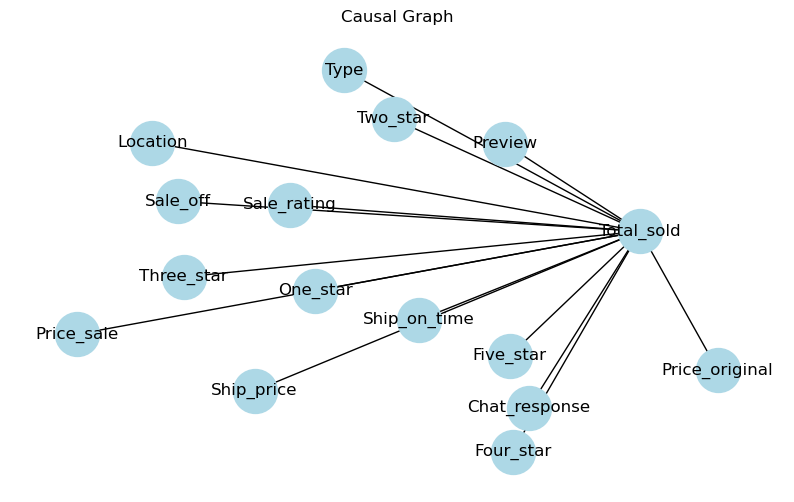

In [113]:
import networkx as nx 

#Giả sử tất cả các biến độc lập có ảnh hưởng đến Total_sold
causal_graph = nx.DiGraph()
causal_graph.add_edges_from([
    ('Type', 'Total_sold'),
    ('Price_sale', 'Total_sold'),
    ('Sale_off', 'Total_sold'),
    ('Preview', 'Total_sold'),
    ('Location', 'Total_sold'),
    ('Price_original', 'Total_sold'),
    ('Ship_price', 'Total_sold'),
    ('Sale_rating', 'Total_sold'),
    ('Ship_on_time', 'Total_sold'),
    ('Chat_response', 'Total_sold'),
    ('One_star', 'Total_sold'),
    ('Two_star', 'Total_sold'),
    ('Three_star', 'Total_sold'),
    ('Four_star', 'Total_sold'),
    ('Five_star', 'Total_sold')
])

plt.figure(figsize=(10,6))
pos = nx.spring_layout(causal_graph, seed=42)
nx.draw_networkx_nodes(causal_graph, pos, node_size=1000, node_color='lightblue')
nx.draw_networkx_edges(causal_graph, pos, arrows=True)
nx.draw_networkx_labels(causal_graph, pos, font_size=12, font_family='sans-serif')
plt.title('Causal Graph')
plt.axis('off')
plt.show()

**Scaling numerical features**

In [114]:
#Split data into features (X) and the target variable (Y): Total_sold
X = new_data.drop(columns=['Total_sold'])
y = new_data['Total_sold']

#Scale X
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc = sc.fit_transform(X)

#Convert data to dataframe
col = X.columns
X_std = pd.DataFrame(X_sc, columns=col)

#### 3.4 **Causal inference method**: using regression model

In [115]:
#Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std, y, train_size=0.8, test_size=0.2, random_state=101)

##### 3.4.a Linear regression

In [116]:
from sklearn.linear_model import LinearRegression
model_regression = LinearRegression()
model_regression.fit(X_train, y_train)

LinearRegression()

In [117]:
#MAE, MSE and Score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#Create dataframe: MAE, MSE, Score

#Train: using model.score: evaluate performance on the training set
#Test: using r2_score: evaluate performance on a separate test data set
evl_train = [mean_squared_error(model_regression.predict(X_train), y_train),
             mean_absolute_error(model_regression.predict(X_train), y_train),
             model_regression.score(X_train, y_train)]

evl_test = [mean_squared_error(model_regression.predict(X_test), y_test),
            mean_absolute_error(model_regression.predict(X_test), y_test),
            r2_score(y_test, model_regression.predict(X_test))]

evl = pd.DataFrame([evl_train, evl_test], index=['Train', 'Test'], columns=['MSE', 'MAE', 'Score']).T
evl = evl.round(3)
evl

,Train,Test
MSE,436323.746,1353745.039
MAE,175.961,220.430
Score,0.790,0.651


In [118]:
# Bước 3: Phân tích hệ số hồi quy
# Thêm hằng số vào X_train để sử dụng với statsmodels
import statsmodels.api as sm
from tabulate import tabulate
# Đặt tùy chọn hiển thị của pandas để hiển thị tất cả các cột
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Đặt lại chỉ số để đảm bảo căn chỉnh chính xác
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

X_train_sm = sm.add_constant(X_train)  # Thêm hằng số cho mô hình
ols_model = sm.OLS(y_train, X_train_sm).fit()
# print(ols_model.summary())

# Bước 3: Chuyển đổi summary thành DataFrame
summary = ols_model.summary2().tables[1]

# Bước 4: Hiển thị kết quả dưới dạng bảng đẹp
print(tabulate(summary.round(3), headers='keys', tablefmt='psql'))

+----------------+----------+------------+--------+---------+----------+----------+
|                |    Coef. |   Std.Err. |      t |   P>|t| |   [0.025 |   0.975] |
|----------------+----------+------------+--------+---------+----------+----------|
| const          |  458.041 |     11.253 | 40.702 |   0     |  435.977 |  480.105 |
| Type           |   53.03  |     12.343 |  4.296 |   0     |   28.829 |   77.231 |
| Price_sale     |  -24.74  |     52.522 | -0.471 |   0.638 | -127.718 |   78.239 |
| Sale_off       |  -19.435 |     13.781 | -1.41  |   0.159 |  -46.456 |    7.585 |
| Preview        | 1242.91  |     47.67  | 26.073 |   0     | 1149.45  | 1336.38  |
| Location       |   10.958 |     11.421 |  0.959 |   0.337 |  -11.436 |   33.351 |
| Price_original |   55.048 |     51.306 |  1.073 |   0.283 |  -45.544 |  155.641 |
| Ship_price     |   -9.784 |     11.836 | -0.827 |   0.408 |  -32.991 |   13.423 |
| Sale_rating    |   -4.086 |     13.091 | -0.312 |   0.755 |  -29.754 |   2